In [3]:
from bonsai.visualizer import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prune Visualization

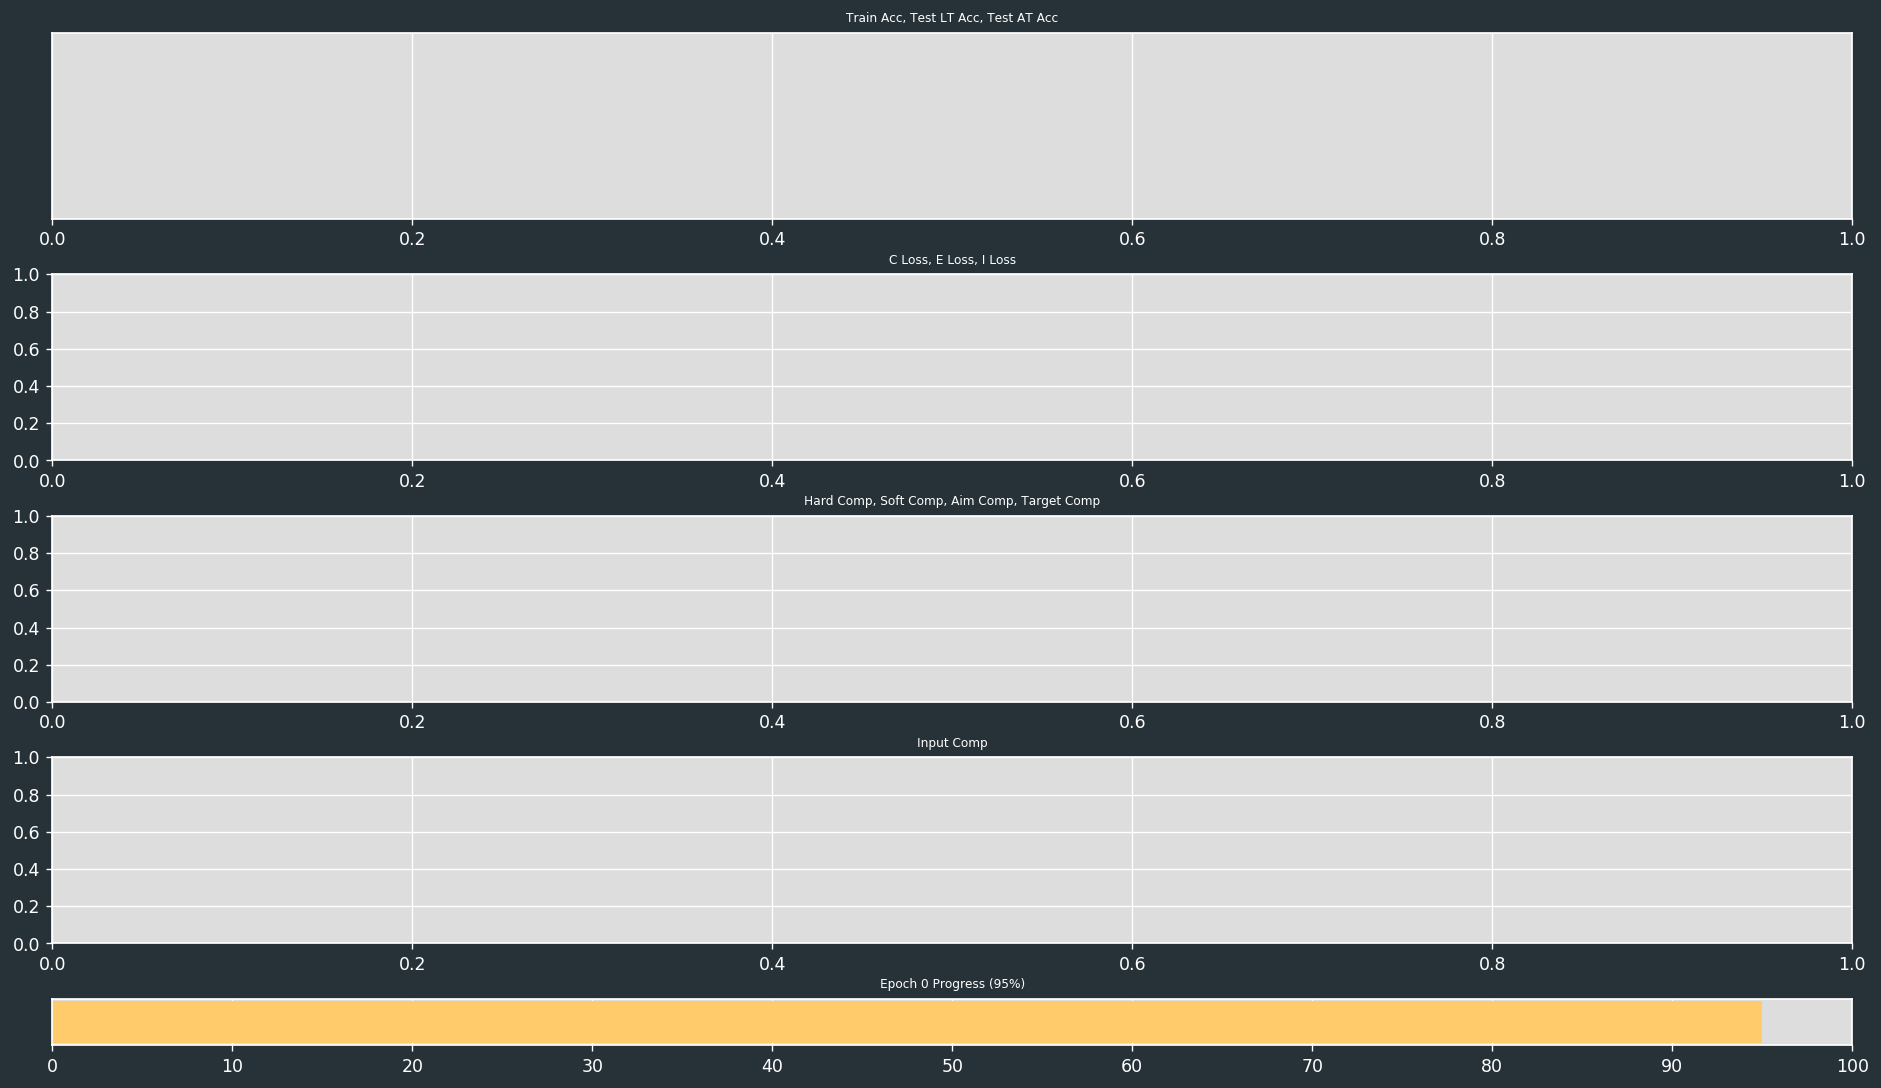

95 95
(Empty DataFrame
Columns: []
Index: [], 95)


KeyboardInterrupt: 

In [11]:
PrunePlot((16,9)).monitor()

# Train Visualization

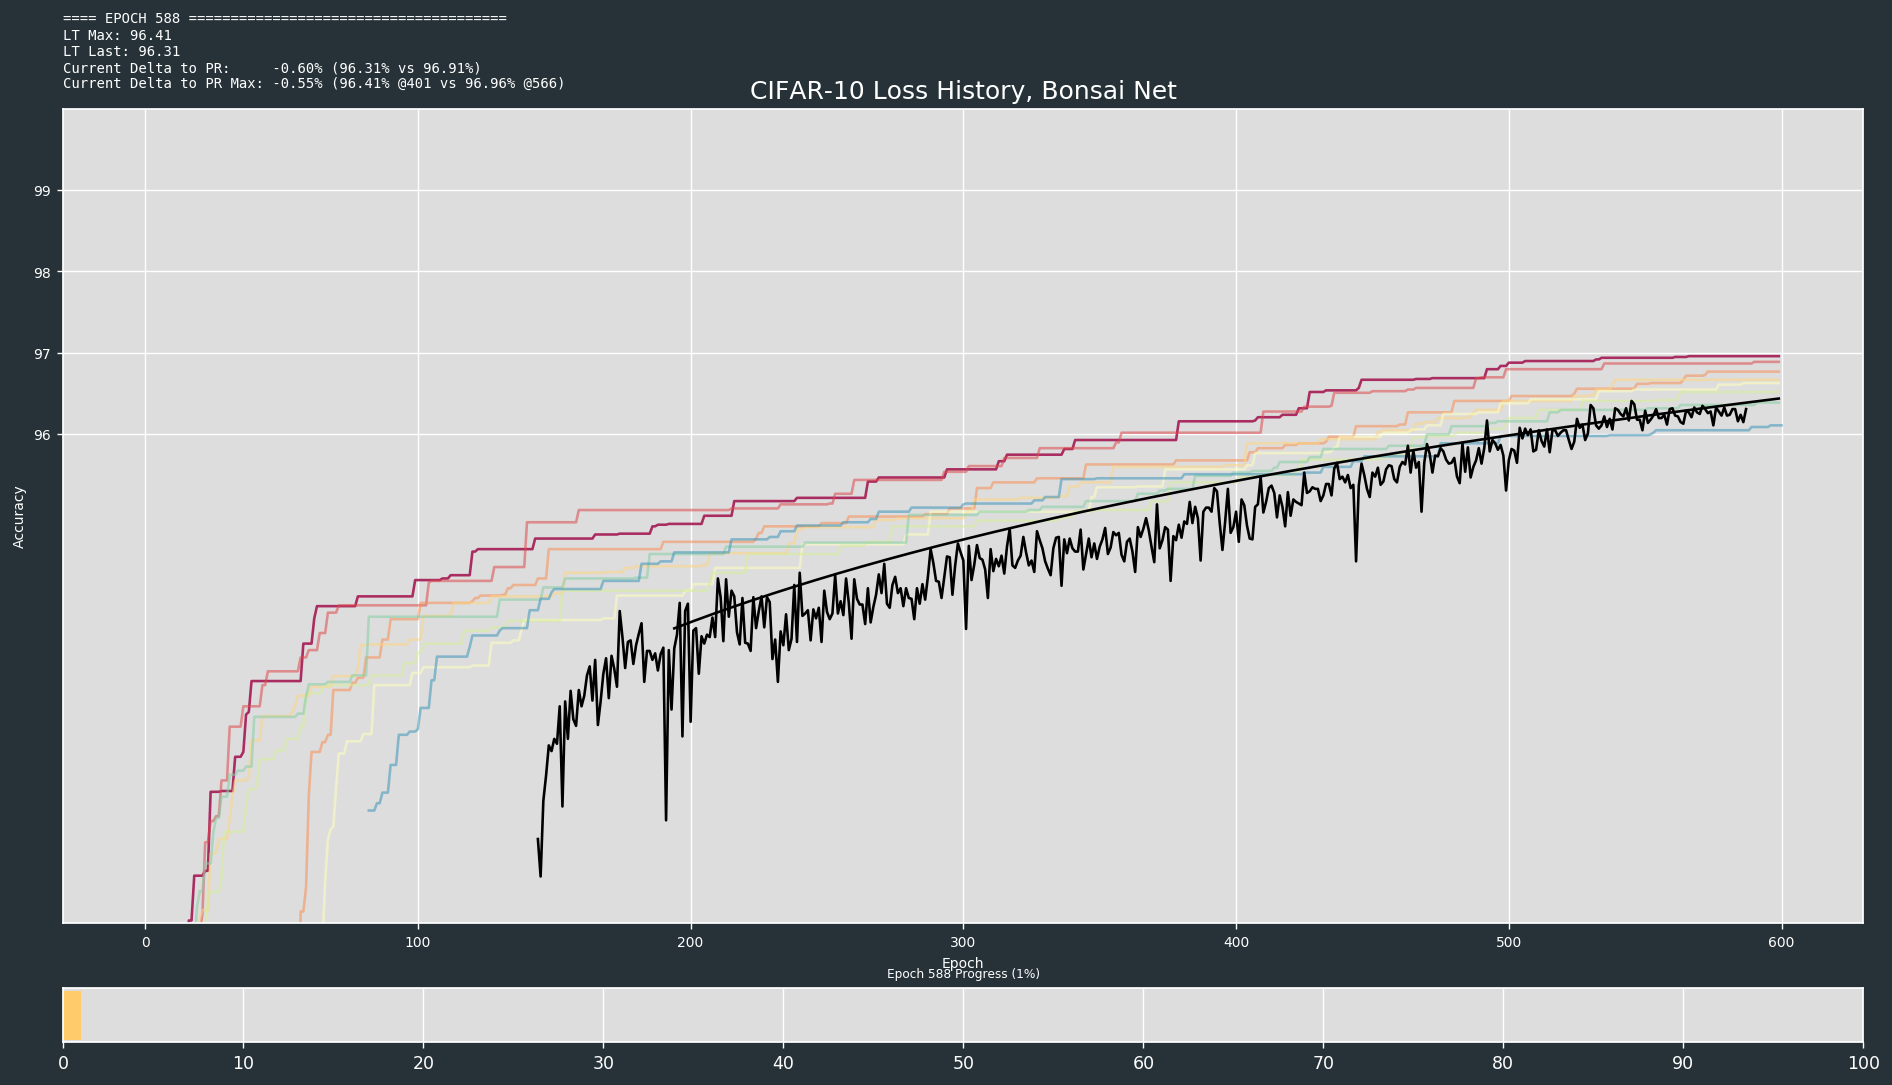

In [ ]:
TrainPlot((16,9)).monitor()